In [28]:
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import pandas as pd

import sklearn as sk
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import matplotlib.pyplot as plt

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()

X_iris = iris.data
y_iris = iris.target

print('Class labels{}, which correspond to species {}'.format(np.unique(y_iris), iris['target_names']))

Class labels[0 1 2], which correspond to species ['setosa' 'versicolor' 'virginica']


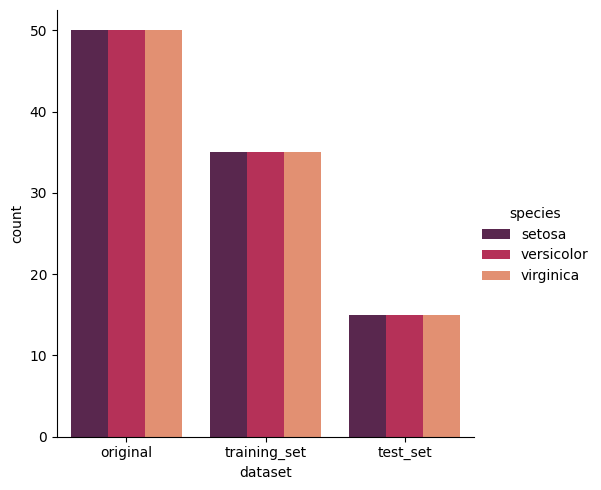

In [30]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, 
                                                                        test_size=0.3, 
                                                                        random_state=1, 
                                                                        stratify=y_iris) # ensure the distribution of labels will be the same in the training and test sets as they are in the original dataset

iris_label_df = pd.DataFrame(iris['target_names'], columns=['species'])
iris_label_df = iris_label_df.assign(original = np.bincount(y_iris),            # count number of occurrences of each value in array of non-negative ints
                                     training_set = np.bincount(y_iris_train), 
                                     test_set = np.bincount(y_iris_test))

iris_label_df = pd.DataFrame.melt(iris_label_df, id_vars='species')
iris_label_df.rename(columns={'variable':'dataset', 'value':'count'}, inplace=True)

sns.catplot(data=iris_label_df, x="dataset", y="count", hue="species", kind="bar", palette='rocket')

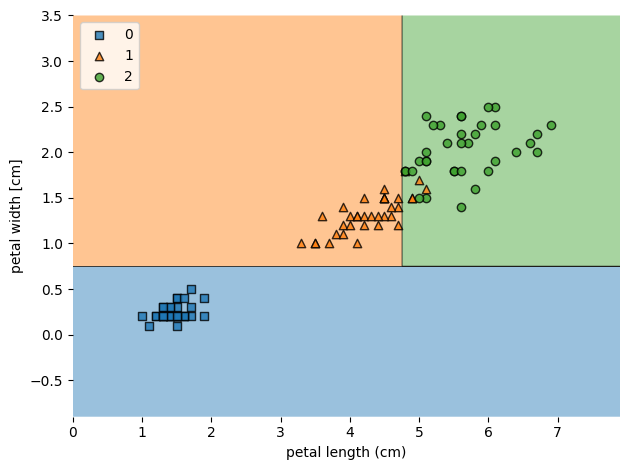

In [36]:
iris_tree = DecisionTreeClassifier(criterion='entropy', 
                                   max_depth=3, 
                                   random_state=1)
iris_tree.fit(X_iris_train[:, 2:4], y_iris_train)


plot_decision_regions(X_iris_train[:, 2:4], y_iris_train, iris_tree)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

[Text(0.3333333333333333, 0.875, 'petal width (cm) <= 0.75\nentropy = 1.585\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal length (cm) <= 4.75\nentropy = 1.0\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = versicolor'),
 Text(0.6666666666666666, 0.375, 'petal length (cm) <= 5.15\nentropy = 0.544\nsamples = 40\nvalue = [0, 5, 35]\nclass = virginica'),
 Text(0.5, 0.125, 'entropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]\nclass = virginica'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 25\nvalue = [0, 0, 25]\nclass = virginica')]

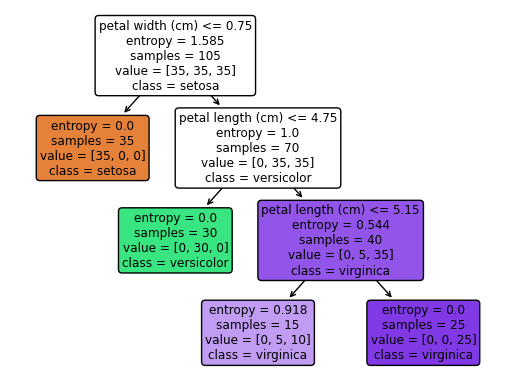

In [37]:
tree.plot_tree(iris_tree, 
               feature_names=iris['feature_names'][2:], 
               class_names=iris['target_names'],
               rounded=True,
               filled=True)